In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# F_beta Measure
This measure takes the predicted classes as input.
The hyperparameter beta can be calculated by cost of false negative/ cost of false positive.

In [ ]:
def prec(pred, label):
    TP = sum((pred==1) & (label==1))
    FP = sum((pred==1) & (label==0))
    return TP/(TP+FP)

def recall(pred, label):
    TP = sum((pred==1) & (label==1))
    FN = sum((pred==0) & (label==1))
    return TP/(TP+FN)

def f_beta_score(pred, label, beta):
    precision = prec(pred, label)
    recall = recall(pred, label)
    beta_squared = beta ** 2
    f_beta = (1 + beta_squared) * ((precision * recall) / ((beta_squared * precision) + recall))
    return f_beta


# ROC
The ROC is optimistic under imbalanced dataset, hence not a good choice.

In [ ]:
def roc(pred, label):
    fpr, tpr = [], []
    tmax = max(pred)
    tmin = min(pred)
    for t in linspace(tmin, tmax, 100):
        p = pred > t
        tpr.append(TPR(p, label))
        fpr.append(FPR(p, label))
    return fpr, tpr

def AUC(fpr, tpr):
    return sum([(tpr[i]+tpr[i-1])*(fpr[i-1]-fpr[i])/2 for i in range(1, len(fpr))])

Example of plot ROC:

In [ ]:
#y_score0 = clf0.decision_function(X_test)
#fpr0, tpr0 = roc(y_score0, y_test)

#plt.plot(fpr0, tpr0, color = 'orange', label = 'Logistic Regression', linewidth = 4)

# Precision-Recall Curve
This is an alternative to the ROC, and it focuses on the performance of the classifier on the minority class.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have the predicted probabilities and true labels
y_scores = [...]  # predicted probabilities
y_true = [...]  # true labels

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Confusion Matrix

In [ ]:
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

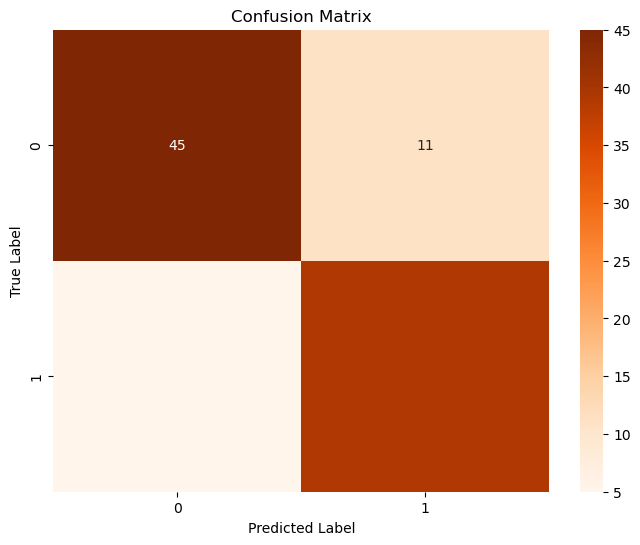

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the test set
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
